# 구매 요인 분석 (Decision Tree)

Decision Tree 모델을 통하여 온라인 경매 아이템 판매 여부를 예측하고 각 변수의 영향도를 확인

Decision Tree의 원리
- 트리 구조를 기반으로 하며, 각 노드는 특정 속성에 대한 질문을 나타내고, 그에 따라 데이터를 분할(Yes/No)하여 예측을 수행


Binary Classification
- 머신러닝 알고리즘x 
- 머신러닝 알고리즘을 이용해서 풀어야할 문제 유형 중 하나
- 0과 1로 나타내며 예측치는 %로 표현 가능

Decision Tree vs Logistic Regression

1. Decision Tree
- Non Parametric (비모수적) : 데이터를 설명하는 데 고정된 수의 매개변수를 사용하지 않음. 즉, 데이터의 분포나 관계에 대한 구체적인 가정을 하지 않음
- Feature Power를 풍부하게 설명할 수 없음
- Categorical Value를 바꾸지 않고도 알고리즘 돌리는 것이 가능

2. Logistic Regression
- Parametric (모수적) : 데이터가 선형적으로 구분 가능하다는 가정하에, 가중치가 선형 결합으로 데이터를 설명할 수 있다고 가정
- Feature Power 잘 설명 함 (ex. R-squared, p-value, coe_f 등등)
- Categorical Value를 One-Hot Encoding을 통해 변경해야 함

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## 한글 폰트 설정
import os
os.name

import os
if os.name == 'posix' :
    plt.rc('font', family='AppleGothic')    # 맥
else:
    plt.rc('font', family='Malgun Gothic')  # 윈도우

# 마이너스 폰트 깨지는 문제애 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 더 선명해짐
%config InlineBackend.figure_font = 'retina'

In [3]:
# 데이터 불러오기
df = pd.read_csv("galaxy.csv")

print(df.shape)
df.head()

(1485, 9)


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [4]:
# 변수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [5]:
# 수치형 변수 확인
df.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


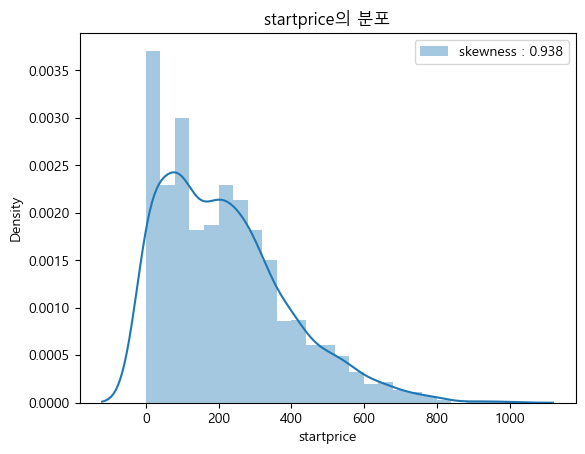

In [6]:
# startprice 분포 
sns.distplot(df['startprice'], label='skewness : {:.3f}'.format(df['startprice'].skew()))

plt.title('startprice의 분포')
plt.legend()
plt.show()

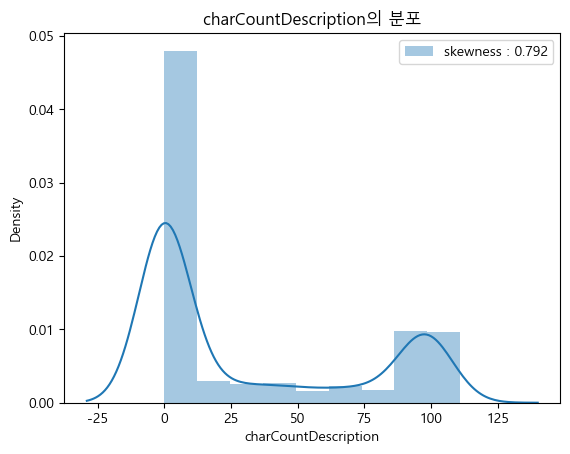

In [7]:
# charCountDescription 분포 
sns.distplot(df['charCountDescription'], label='skewness : {:.3f}'.format(df['charCountDescription'].skew()))

plt.title('charCountDescription의 분포')
plt.legend()
plt.show()

<Axes: xlabel='productline', ylabel='startprice'>

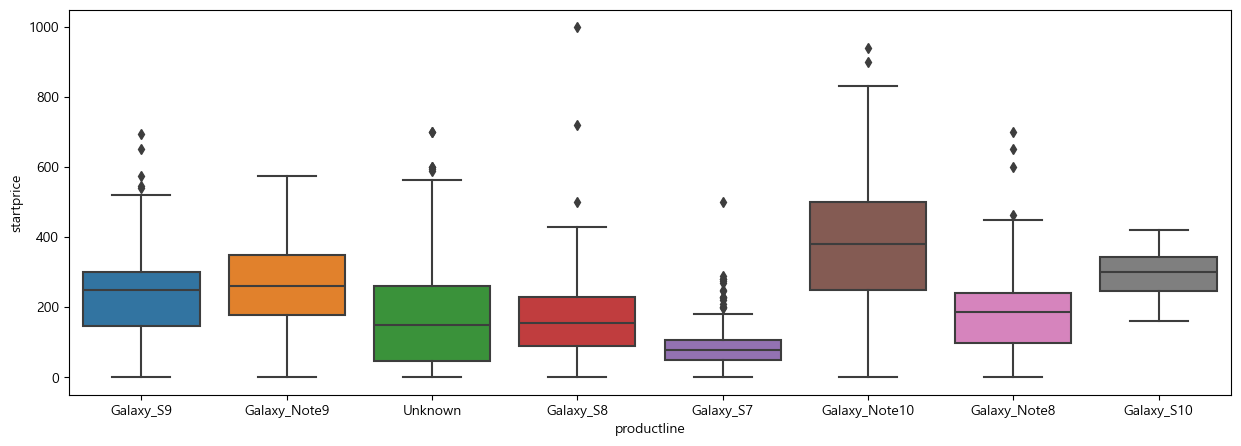

In [8]:
# 모델별 startprice 분포
plt.figure(figsize=(15, 5))

sns.boxplot(data=df, x='productline', y='startprice')

missing value

In [9]:
# 결측치 확인
df.isna().sum() / len(df) * 100

BuyItNow                 0.000000
startprice               0.000000
carrier                 78.720539
color                   39.932660
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

In [10]:
# 결측치 대체
df.fillna('Unknown', inplace=True)

# 확인
df.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,Unknown,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,Unknown,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Unknown,Space Gray,Galaxy_S8,contains description,0,0,1


In [11]:
df['carrier'].value_counts()

carrier
Unknown            1169
AT&T                177
Verizon              87
Sprint/T-Mobile      52
Name: count, dtype: int64

In [12]:
df['color'].value_counts()

color
Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

category 변수 처리

In [13]:
# 변수별 유니크한 값 확인
df[['carrier', 'color', 'productline', 'noDescription']].nunique()

carrier          4
color            8
productline      8
noDescription    2
dtype: int64

In [14]:
# 변수별 value_counts
df['carrier'].value_counts()

carrier
Unknown            1169
AT&T                177
Verizon              87
Sprint/T-Mobile      52
Name: count, dtype: int64

In [15]:
df['color'].value_counts()

color
Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [16]:
## balck 통일 함수 생성 후 적용

# 함수 생성성
def black(x) : 
    if x in ['Midnight Black', 'Aura Black', 'Prism Black']:
        return 'Black'
    else : 
        return x
    
# 함수 적용
df['color'] = df['color'].apply(lambda x : black(x))

# 확인
df['color'].value_counts()

color
Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: count, dtype: int64

In [17]:
df['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

In [18]:
df['noDescription'].value_counts()

noDescription
contains description    856
no description          629
Name: count, dtype: int64

In [19]:
# object형 One-Hot Encoding
df = pd.get_dummies(df, columns=['carrier', 'color', 'productline', 'noDescription'], drop_first=True).applymap(lambda x : int(x) if isinstance(x, bool) else x)

print(df.shape)
df.head()

(1485, 20)


,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Gold,color_Space Gray,color_Unknown,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,0,199.99,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,235.00,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
2,0,199.99,100,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1
3,1,175.00,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1,100.00,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


Train & Test Split

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('sold', axis=1)
y = df['sold']

X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.2
                                                    , random_state = 2024)

모델 학습

In [21]:
from sklearn.tree import DecisionTreeClassifier

# 객체 생성
# max_depth : 나무의 깊이
model = DecisionTreeClassifier(max_depth = 10)

# 모델 학습
model.fit(X_train, y_train)

# 예측 
pred_y = model.predict(X_test)

In [22]:
# 예측률
from sklearn.metrics import accuracy_score, confusion_matrix

print('max_depth=10일 때 예측 확률 {:.2f} %'.format(100 * accuracy_score(y_test, pred_y)))

max_depth=10일 때 예측 확률 72.73 %


## 최적의 tree를 찾아서 (파라미터 튜닝)

In [23]:
accuracy_list = []

for i in range(2, 31) :

    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    accuracy_list.append(accuracy_score(y_test, pred))

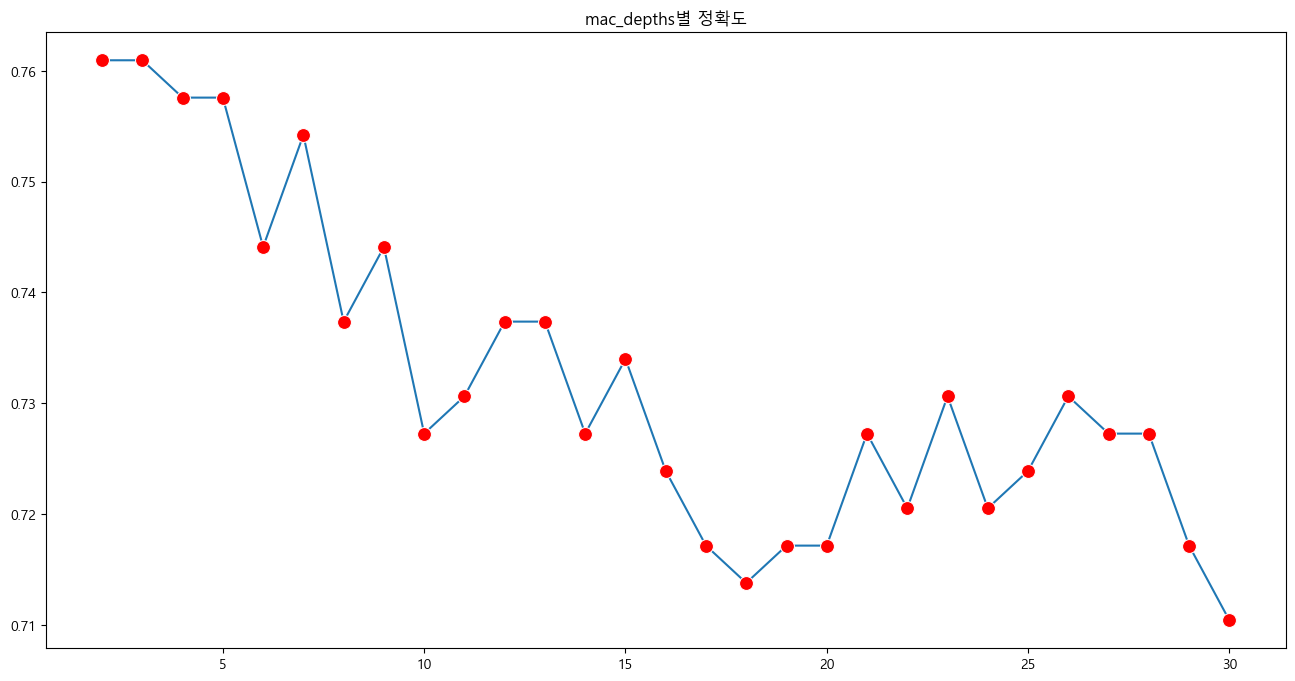

In [24]:
# 시각화
plt.figure(figsize=(16, 8))

sns.lineplot(x=range(2, 31), y=accuracy_list, marker='o', markersize=10, markerfacecolor='red')

plt.title('mac_depths별 정확도')
plt.show()

In [25]:
## 정확도가 가장 높은 max_depth (max_depth=2일 때 정확도가 가장 높음)

# 방법 1)
accuracy_list.index(max(accuracy_list)) + 2

# 방법 2)
# np.array(accuracy_list).argmax()

2

In [26]:
# max_depth=2일 때
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
pred_y = tree.predict(X_test)

# 예측률
print('max_depth=2일 때 예측률 : %s' % (100 * accuracy_score(y_test, pred_y)))

# Confusion Matrix
display(confusion_matrix(y_test, pred_y))

max_depth=2일 때 예측률 : 76.0942760942761


array([[126,  36],
       [ 35, 100]], dtype=int64)

## Tree Plot

In [27]:
from sklearn.tree import plot_tree

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\ngini = 0.497\nsamples = 1188\nvalue = [637, 551]'),
 Text(0.25, 0.5, 'x[1] <= 243.44\ngini = 0.342\nsamples = 657\nvalue = [513, 144]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.409\nsamples = 293\nvalue = [209, 84]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.275\nsamples = 364\nvalue = [304, 60]'),
 Text(0.75, 0.5, 'x[1] <= 142.475\ngini = 0.358\nsamples = 531\nvalue = [124, 407]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.202\nsamples = 334\nvalue = [38, 296]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.492\nsamples = 197\nvalue = [86, 111]')]

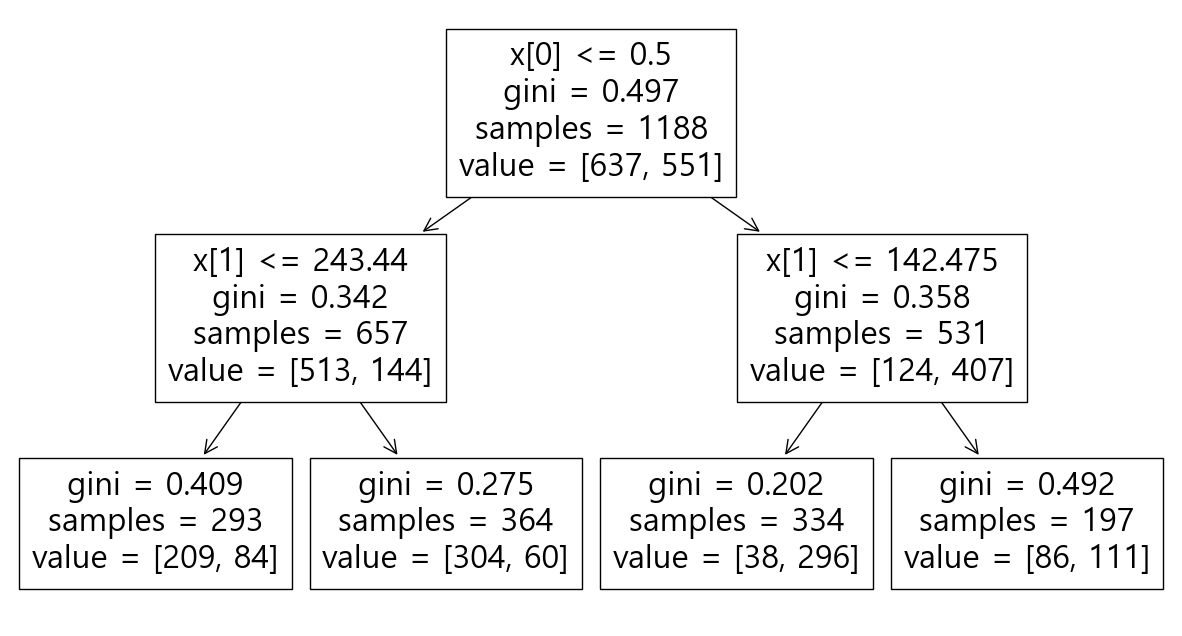

In [28]:
## 시각화
plt.figure(figsize=(15, 8))

plot_tree(tree)

In [ ]:
'''
Decision Tree plot 해석

맨 위의 질문을 기준으로 Yes이면 왼쪽, No이면 오른쪽으로 이동

--------------------------------------------------------------------

x[0]은 독립변수 칼럼에서 0번째 인덱스를 의미
즉, X_train 데이터의 0번째 인덱스 칼럼 (BuyItNow)

samples = 1188 (X_train의 행 수)
value = [637, 551] : 637개 (sold=0), 551개 (sold=1)

--------------------------------------------------------------------

depth = 1일때
왼쪽 tree는 0에 속한 데이터가 많고 오른쪽 tree는 1에 속한 데이터가 많음

x[1]은 독립변수 칼럼에서 1번째 인덱스를 의미
즉, X_train 데이터의 01번째 인덱스 칼럼 (startprice)

--------------------------------------------------------------------
지니 인덱스
- 불평등의 정도를 측정하는 지표
- 일반적으로 0에서 0.5 사이의 값
- 0에 가까울수록 분포가 고르고 (데이터가 한쪽에 깨끗하게 몰림) 0.5에 가까울수록 불평등이 큰 것 (데이터가 반반 분포)
- 지니 인덱스가 낮을수록 데이터가 잘 분리된 상태
'''

[Text(0.5, 0.8333333333333334, 'BuyItNow <= 0.5\n0.497\n1188\n[637, 551]'),
 Text(0.25, 0.5, 'startprice <= 243.44\n0.342\n657\n[513, 144]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'startprice <= 142.475\n0.358\n531\n[124, 407]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

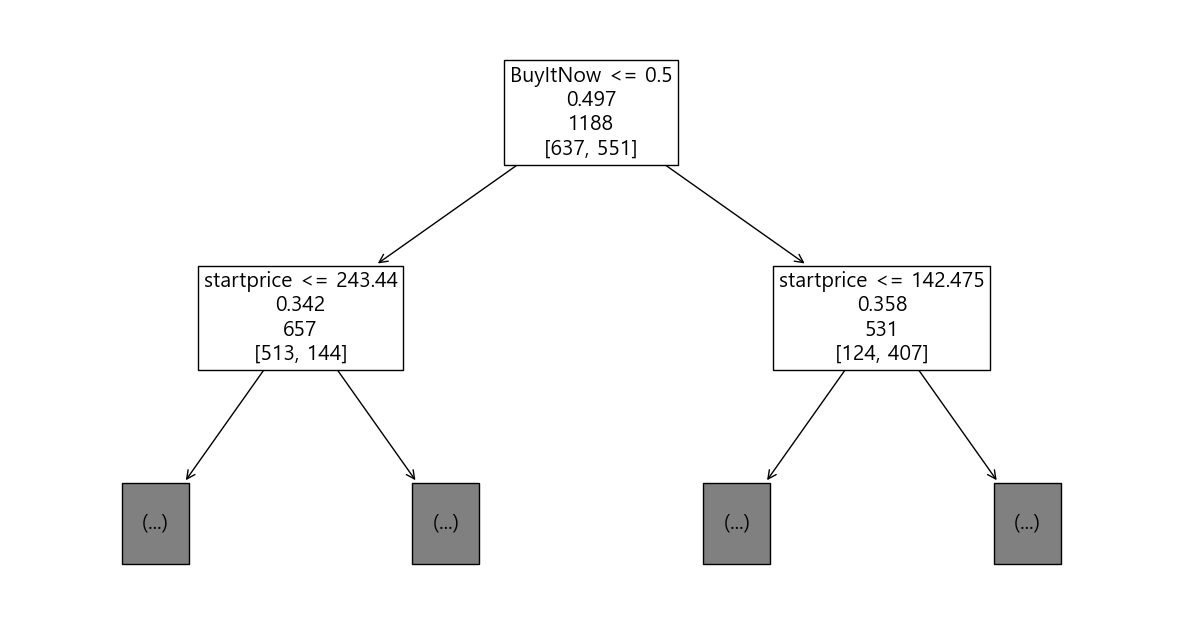

In [30]:
## 그래프 수정
plt.figure(figsize=(15, 8))

# label='none' : 불필요한 레이블 삭제
# max_depth : 모델의 depth와 상관없이 plot용 depth 설정
plot_tree(tree, feature_names=X_train.columns, fontsize=15, label='none', max_depth=1)